# The African Writers Series

### The African Writers Series was the landmark imprint for African literature in English in the 20th century. The series was founded in 1962 under the leadership of Alan Hill and James Currey with Chinua Achebe as its first advisory editor. 
### The AWS published a wide range of genres (novels, theater, poetry, folklore, biography) from writers across the continent. The output of the series faltered due to financial troubles in the late 1980s, but it continues today in a different form. 
### The AWS was the an important gateway for the consecration of African writers. Every African Nobel laureate in literature except J.M. Coetzee is an AWS author. Wole Soyinka, Doris Lessing, Naguib Mahfouz, even Mandela. 
### Canons are always controversial, but the AWS is as close as there is to a ‘canon’ of modern anglophone African literature. Beginning with the publication of Things Fall Apart, the AWS published most of what became the canon of modern African literature in the next two and a half decades. It was also influential even outside of anglophone writing as one of the most visible points of entry for authors working in another language to become known to English-reading publics -- Mariama Bâ, Pepetela, Ousmane Sembène, and so on found a larger audience through translations into the AWS series.
### In this notebook, we're asking a series of questions about the AWS and seeing what it is possible to learn via text mining approaches. We'll be using the Literary Language Tool Kit, developed by Ryan Heuser.

<center><img src="aws_1960.jpg" /></center>
<center><img src="aws covers1970.jpg" /></center>
<center><img src="aws covers1980.jpg" /></center>

## First, a quick overview of the corpus. A total of 276 titles were published between the series' founding in 1962 and the departure of its first editors in 1987. The current corpus currently contains 170 titles. I am assembling the rest slowly but surely.

### Here's a snapshot of what the full AWS corpus looks like

### The AWS is closely associated with a 'rise of the African novel'. There's a reason for that

In [3]:
from aws import *

In [4]:
df_aws_master = pd.read_excel('/Users/tobywarner/Dropbox/textmining/corpora/aws/metadata_master.xls')

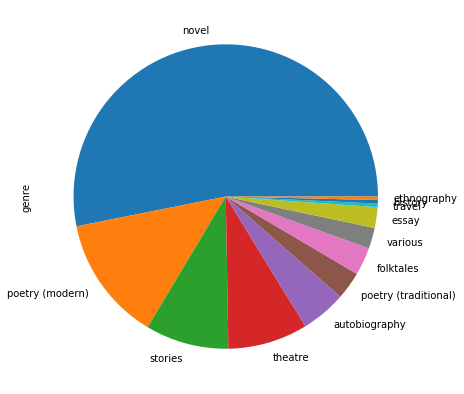

In [5]:
df_aws_master.genre.value_counts().plot(kind='pie', figsize=(7,7))

### It was also heavily male 

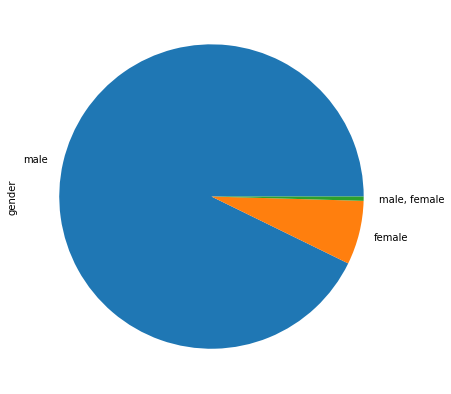

In [6]:
df_aws_master.gender.value_counts().plot(kind='pie', figsize=(7,7))

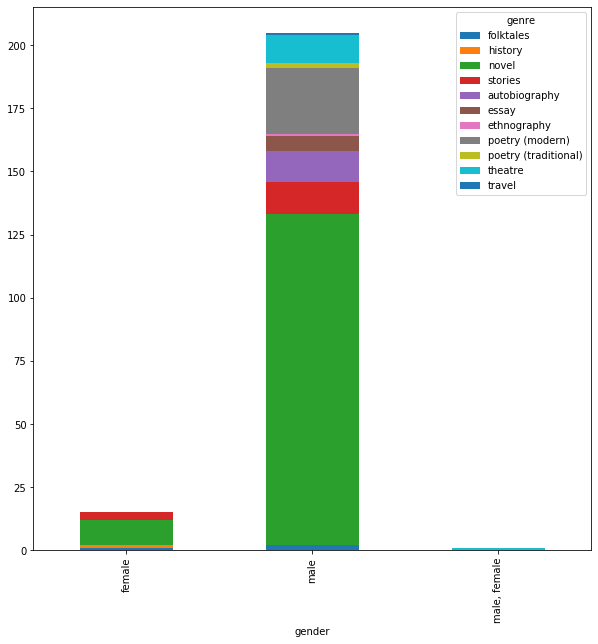

In [7]:
df_aws_master.groupby(['gender', 'genre']).size().unstack().plot(kind='bar', figsize=(10,10), stacked=True)

### The series has a titles from all over the continent. But it also published a lot of Nigerian novelists, which probably reflects Achebe's involvement. 

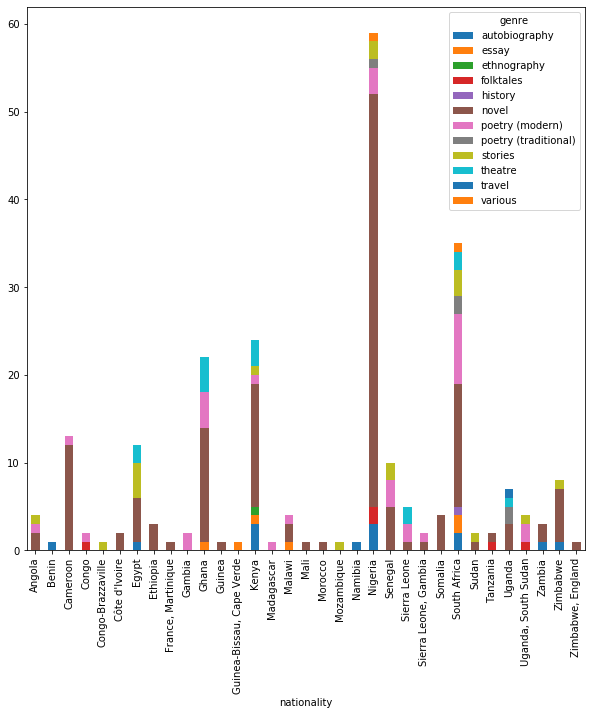

In [8]:
df_aws_master.groupby(['nationality', 'genre']).size().unstack().plot(kind='bar', figsize=(10,10), stacked=True)

### We can see the decline in # of titles published over time here

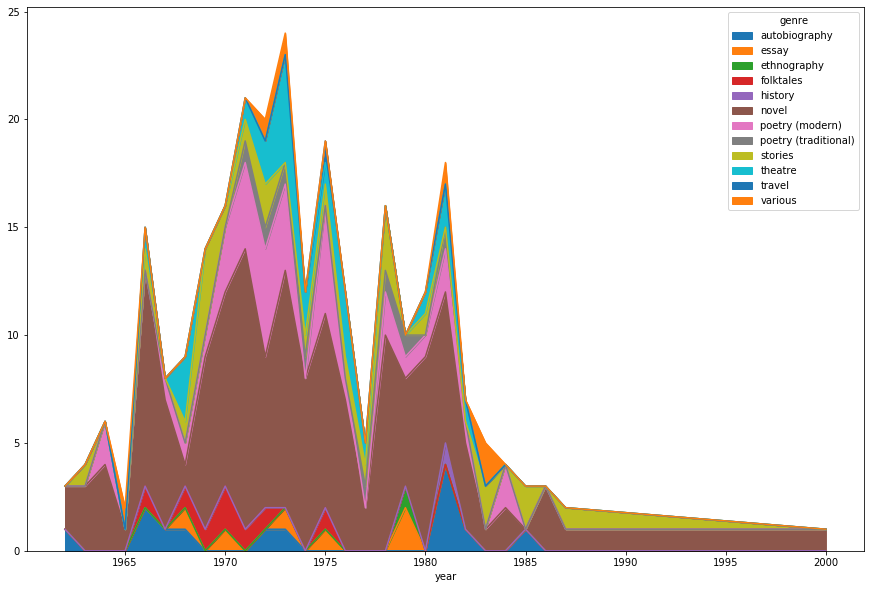

In [9]:
df_aws_master.groupby(['year', 'genre']).size().unstack().plot(kind='area', figsize=(15,10), stacked=True)

# Getting started with LLTK

In [10]:
import lltk

In [11]:
C=get_corpus()

In [12]:
C.meta

,author,title,year,fn,have,number,genre,anthology,originallanguage,translator,editor,gender,nationality,origpubdate,note,path_freqs,path_txt,path_xml,_year_orig,corpus
id,,,,,,,,,,,,,,,,,,,,
AWS010,"Equiano, Olaudah",Equiano's Travels: His Autobiography; The Inte...,1966,AWS010.txt,yes,10,autobio,no,English,,Olaudah Equiano,,Benin,1789.0,,/Users/tobywarner/lltk_data/corpora/aws/freqs/...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws/xml/AW...,1966,AWS
AWS020,"Gatheru, Mugo",Child of Two Worlds.,1966,AWS020.txt,yes,20,autobio,no,English,,,male,Kenya,,,/Users/tobywarner/lltk_data/corpora/aws/freqs/...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws/xml/AW...,1966,AWS
AWS228,"Hussein, Taha",An Egyptian Childhood: the autobiography of Ta...,1981,AWS228.txt,yes,228,autobio,no,Arabic,E. H. Paxton,,male,Egypt,,Translated by E. H. Paxton.,/Users/tobywarner/lltk_data/corpora/aws/freqs/...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws/xml/AW...,1981,AWS
AWS244,"Ya-Otto, John",Battlefront Namibia: an autobiography,1982,AWS244.txt,yes,244,autobio,no,English,,"Ole Gjerstad, Michael Mercer",male,Namibia,,,/Users/tobywarner/lltk_data/corpora/aws/freqs/...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws/xml/AW...,1982,AWS
AWS249,"Obasanjo, Olusegun",My Command: An Account of the Nigerian Civil W...,1981,AWS249.txt,yes,249,autobio,no,English,,,male,Nigeria,,,/Users/tobywarner/lltk_data/corpora/aws/freqs/...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws/xml/AW...,1981,AWS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AWS216,"Yirenkyi, Asiedu",Kivuli and other plays.,1980,AWS216.txt,yes,216,theatre,no,English,,,male,Ghana,,,/Users/tobywarner/lltk_data/corpora/aws/freqs/...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws/xml/AW...,1980,AWS
AWS232,"Johnson-Davies, Denys (ed.)",Egyptian One-act Plays.,1981,AWS232.txt,yes,232,theatre,no,Arabic,Denys Johnson-Davies,Denys Johnson-Davies,,Egypt,,Selected and translated from the Arabic by Den...,/Users/tobywarner/lltk_data/corpora/aws/freqs/...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws/xml/AW...,1981,AWS
AWS264,"De Graft, Joe",Muntu.,1977,AWS264.txt,yes,264,theatre,no,English,,,male,Ghana,,,/Users/tobywarner/lltk_data/corpora/aws/freqs/...,/Users/tobywarner/Dropbox/textmining/corpora/a...,/Users/tobywarner/lltk_data/corpora/aws/xml/AW...,1977,AWS


# Some building blocks...

In [13]:
# Making a DF of the MFW
C.mfw_df(n=1000,excl_stopwords=True)

,count,fpm,rank,ranks_avg,pos,pos0
word,,,,,,
people,19384,2120.317286,1,65,nn1,n
time,18475,2020.886394,2,69,nn1,n
day,11398,1246.769316,4,96,nn1,n
father,10290,1125.570825,5,106,nn1,n
woman,9104,995.840310,6,119,nn1,n
...,...,...,...,...,...,...
dangerous,621,67.928035,996,1319,jj,j
sounded,621,67.928035,997,1320,vvd,v
matters,620,67.818650,998,1322,nn2,n


In [14]:
# Let's make a dtm
dtm_tfidf = C.dtm(tf=True, excl_stopwords=True)
dtm_tfidf

,people,time,day,father,woman,eyes,house,told,own,am,...,salamanders,circumscribed,stent,favorite,reunite,buckled,bloodstream,epilepsy,shuttered,swellings
id,,,,,,,,,,,,,,,,,,,,,
AWS001,0.005542,0.003611,0.003985,0.004919,0.003736,0.001743,0.001806,0.004110,0.003238,0.001681,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
AWS002,0.003372,0.004778,0.003841,0.010398,0.004871,0.007681,0.002248,0.003466,0.002248,0.004871,...,0.0,0.0,0.0,0.0,0.000094,0.000000,0.0,0.0,0.0,0.0
AWS003,0.006132,0.005996,0.004156,0.005110,0.001703,0.002589,0.001567,0.005587,0.001022,0.003407,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
AWS005,0.004204,0.006741,0.002536,0.000868,0.004738,0.006273,0.002536,0.003337,0.003404,0.001602,...,0.0,0.0,0.0,0.0,0.000000,0.000067,0.0,0.0,0.0,0.0
AWS006,0.014226,0.006975,0.002048,0.000166,0.011459,0.014946,0.003211,0.004262,0.000941,0.004428,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AWS261,0.000000,0.008850,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004425,0.004425,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
AWS262,0.003406,0.013479,0.004855,0.000507,0.001160,0.002826,0.002391,0.003189,0.001739,0.005145,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
AWS263,0.013230,0.008938,0.004485,0.003872,0.001678,0.008293,0.004130,0.003872,0.000871,0.008067,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


## What does the corpus look like right now?

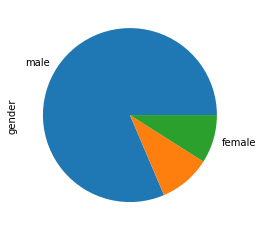

In [15]:
# Breakdown of author gender
C.meta['gender'].value_counts().plot.pie()

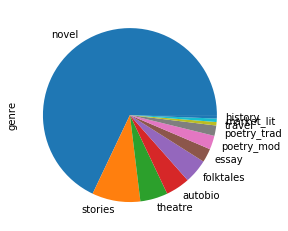

In [16]:
# Breakdown of genre
C.meta['genre'].value_counts().plot.pie()

## Taking a peek at TFIDF for some well known AWS titles

In [17]:
# Obiechina
dtm_tfidf.loc['AWS109'].sort_values(ascending=False).head(25)

love          0.022989
pamphlets     0.015252
pamphlet      0.013042
literature    0.012157
authors       0.011052
popular       0.010831
life          0.009947
market        0.007515
writers       0.007294
money         0.006852
people        0.005526
marriage      0.005084
african       0.005084
hard          0.004642
girls         0.004421
reader        0.004200
economic      0.003758
story         0.003758
english       0.003537
war           0.003316
matter        0.003316
letters       0.003095
printing      0.003095
romantic      0.003095
readers       0.003095
Name: AWS109, dtype: float64

In [18]:
# Bâ
dtm_tfidf.loc['AWS248'].sort_values(ascending=False).head(25)

life        0.007551
children    0.004973
time        0.004973
mother      0.004420
woman       0.004328
love        0.003776
day         0.003499
own         0.003315
school      0.003223
heart       0.003131
women       0.003039
daughter    0.002947
house       0.002947
eyes        0.002947
wife        0.002947
marriage    0.002855
am          0.002855
hand        0.002763
child       0.002671
people      0.002486
family      0.002394
look        0.002302
white       0.002210
husband     0.002118
towards     0.002026
Name: AWS248, dtype: float64

In [19]:
# Bessie Head, Collector of Treasures
dtm_tfidf.loc['AWS182'].sort_values(ascending=False).head(25)

people      0.013372
life        0.010573
village     0.009827
day         0.007526
time        0.007277
woman       0.007028
women       0.006966
own         0.006779
yard        0.006717
children    0.006220
wife        0.005784
home        0.004416
little      0.004354
head        0.004105
prophet     0.004043
looked      0.003421
water       0.003296
am          0.003234
husband     0.003234
money       0.003172
walked      0.003172
hut         0.003172
child       0.003110
god         0.003110
left        0.002923
Name: AWS182, dtype: float64

In [20]:
# Bessie Head, Rain Clouds Gather
dtm_tfidf.loc['AWS247'].sort_values(ascending=False).head(25)

people     0.008412
life       0.007114
cattle     0.006756
time       0.006353
women      0.006353
chief      0.006085
village    0.006040
looked     0.005638
woman      0.005101
own        0.004653
little     0.004609
walked     0.004295
day        0.004251
country    0.003714
eyes       0.003490
mind       0.003400
stood      0.003400
brother    0.003266
world      0.003132
child      0.003087
home       0.002998
kept       0.002998
hut        0.002908
black      0.002774
farm       0.002774
Name: AWS247, dtype: float64

In [21]:
# Ouologuem
dtm_tfidf.loc['AWS099'].sort_values(ascending=False).head(25)

eyes            0.005220
time            0.003893
white           0.003848
day             0.003848
head            0.003848
black           0.003494
little          0.003185
life            0.003008
body            0.002919
suddenly        0.002919
people          0.002831
god             0.002743
woman           0.002610
notables        0.002477
night           0.002433
bishop          0.002344
lips            0.002344
water           0.002212
women           0.002079
love            0.002079
magnificence    0.002079
blood           0.002035
hand            0.002035
french          0.002035
royal           0.001902
Name: AWS099, dtype: float64

In [22]:
# Salih
dtm_tfidf.loc['AWS066'].sort_values(ascending=False).head(25)

wad            0.007280
time           0.007145
people         0.006471
life           0.005325
village        0.005190
eyes           0.004786
woman          0.004651
god            0.004584
grandfather    0.004516
night          0.004314
house          0.003910
women          0.003775
left           0.003775
heard          0.003775
father         0.003640
found          0.003640
voice          0.003505
day            0.003438
told           0.003438
head           0.003236
love           0.003033
world          0.002966
water          0.002831
am             0.002831
suddenly       0.002764
Name: AWS066, dtype: float64

In [23]:
# Oyono, Houseboy
dtm_tfidf.loc['AWS029'].sort_values(ascending=False).head(25)

madame        0.016008
commandant    0.012089
white         0.009088
eyes          0.007671
father        0.007587
time          0.006086
gullet        0.006003
wife          0.005753
little        0.005503
told          0.005419
hand          0.005086
towards       0.004919
head          0.004836
door          0.004752
cook          0.004586
called        0.004502
looked        0.003919
whites        0.003835
look          0.003752
residence     0.003752
women         0.003669
mouth         0.003418
round         0.003335
night         0.003252
brought       0.003252
Name: AWS029, dtype: float64

In [24]:
# Achebe, TFA
dtm_tfidf.loc['AWS001'].sort_values(ascending=False).head(25)

clan        0.006725
mother      0.006600
children    0.006476
people      0.005542
father      0.004919
village     0.004795
women       0.004732
white       0.004608
called      0.004359
wife        0.004234
brought     0.004172
told        0.004110
earth       0.004047
hut         0.004047
day         0.003985
night       0.003923
woman       0.003736
sat         0.003674
time        0.003611
yams        0.003549
compound    0.003549
heard       0.003549
soon        0.003362
stood       0.003362
god         0.003238
Name: AWS001, dtype: float64

## How do the most frequent words change over time?

### Let's just look at novels and nouns

In [25]:
# set texts
novel_texts = C.meta.query('genre=="novel"')

# create dataframe
top_noun_by_period = C.mfw_df(
    texts=novel_texts,               # specify texts (otherwise all)
    # how words work
    only_pos = {'n*'},       # only part(s) of speech (Penn Treebank, n*)
    n=20,                            # Specify number of top words
    by_ntext=False,                    # Count number of documents not number of words
    by_fpm=True,                       # Count by within-text relative sums
    min_count=None,                    # Minimum count of word
    excl_stopwords=False,              # Exclude stopwords (set in config.txt)
    excl_top=200,                      # Exclude words ranked 1:`not_top`
    
    # how periods work
    yearbin=5,                        # Average relative counts across `yearbin` periods
    col_group='period',                # Which column to store `yearbin` period on
    n_by_period=None,                  # Number of top words per period
    keep_periods=True,                 # Keep periods in output dataframe
    n_agg='median',                    # How to aggregate across periods
    min_periods=None,                  # minimum number of periods a word must appear in
    valtype='fpm',                     # valtype to compute top words by
    #**attrs
)
top_noun_by_period

[AWS] Counting most frequent words across 5-year periods [x3]: 100%|██████████| 6/6 [00:01<00:00,  3.15it/s]


,period,word,count,fpm,rank,pos,pos0
0,1960-1965,thing,4595,576.782201,217,nn1,n
1,1965-1970,thing,12742,580.878723,206,nn1,n
2,1975-1980,thing,12547,525.099984,211,nn1,n
3,1980-1985,thing,7522,581.547592,200,nn1,n
4,1960-1965,years,4544,570.380483,220,nn2,n
...,...,...,...,...,...,...,...
99,1985-1990,death,957,480.274133,284,nn1,n
100,1965-1970,work,10807,492.666486,234,nn1,n
101,1975-1980,work,13342,558.371243,200,nn1,n
102,1980-1985,work,7097,548.689612,206,nn1,n


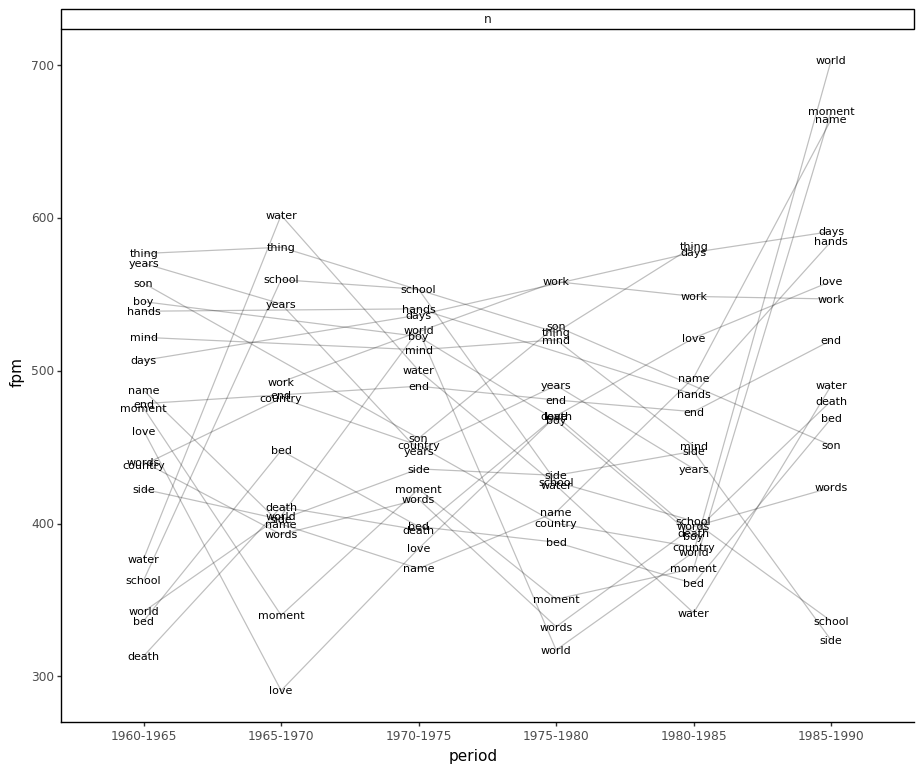

<ggplot: (8793746860949)>

In [26]:
# Simple plot
import plotnine as p9
p9.options.figure_size=(11,9)
p9.ggplot(
    p9.aes(x='period',y='fpm',label='word',group='word'),
    data=top_noun_by_period
) + p9.facet_wrap('pos0') + p9.geom_line(alpha=0.25) + p9.geom_text(size=8) + p9.theme_classic()

### Lets try it with novels and verbs now...

In [27]:
# set texts
novel_texts2 = C.meta.query('genre=="novel"')

# create dataframe
top_verb_by_period = C.mfw_df(
    texts=novel_texts,               # specify texts (otherwise all)
    # how words work
    only_pos = {'v*'},       # only part(s) of speech (Penn Treebank, n*)
    n=20,                            # Specify number of top words
    by_ntext=False,                    # Count number of documents not number of words
    by_fpm=True,                       # Count by within-text relative sums
    min_count=None,                    # Minimum count of word
    excl_stopwords=False,              # Exclude stopwords (set in config.txt)
    excl_top=200,                      # Exclude words ranked 1:`not_top`
    
    # how periods work
    yearbin=5,                        # Average relative counts across `yearbin` periods
    col_group='period',                # Which column to store `yearbin` period on
    n_by_period=None,                  # Number of top words per period
    keep_periods=True,                 # Keep periods in output dataframe
    n_agg='median',                    # How to aggregate across periods
    min_periods=None,                  # minimum number of periods a word must appear in
    valtype='fpm',                     # valtype to compute top words by
    #**attrs
)
top_verb_by_period

,period,word,count,fpm,rank,pos,pos0
0,1960-1965,found,5061,635.276326,203,vvd,v
1,1965-1970,found,11951,544.818837,216,vvd,v
2,1970-1975,found,15076,409.168645,256,vvd,v
3,1975-1980,found,12536,524.639627,212,vvd,v
4,1980-1985,found,5476,423.365410,251,vvd,v
...,...,...,...,...,...,...,...
106,1985-1990,ask,371,186.187778,603,vv0,v
107,1965-1970,sat,13118,598.019706,201,vvd,v
108,1975-1980,sat,10940,457.846005,245,vvd,v
109,1980-1985,sat,5294,409.294463,260,vvd,v


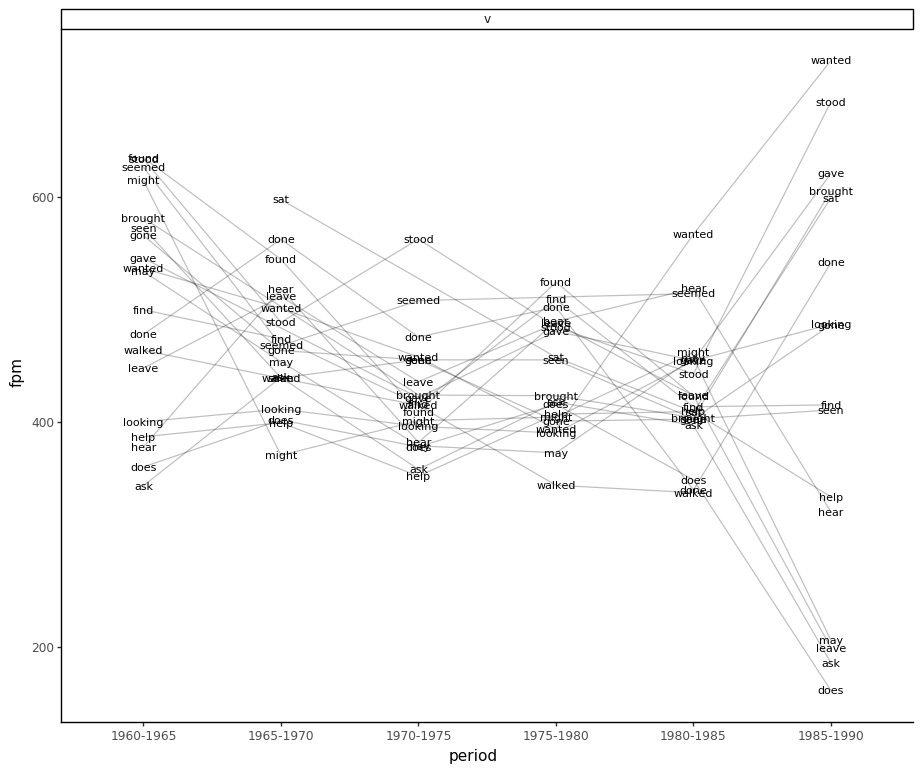

<ggplot: (8793743856357)>

In [28]:
# Simple plot
import plotnine as p9
p9.options.figure_size=(11,9)
p9.ggplot(
    p9.aes(x='period',y='fpm',label='word',group='word'),
    data=top_verb_by_period
) + p9.facet_wrap('pos0') + p9.geom_line(alpha=0.25) + p9.geom_text(size=8) + p9.theme_classic()

## Let's import some other corpora

In [29]:
# this is TxtLab
C2 = get_corpus2()

In [30]:
C2.meta

""


In [31]:
# this is MarkMark
C3 = get_corpus3()

In [32]:
C3.meta

""


# Let's try to compare corpora

In [33]:
dtm1 = C.dtm()

In [34]:
# code is breaking here
dtm2 = C3.dtm()

AttributeError: 'DataFrame' object has no attribute 'id'

In [ ]:
dtm1['corpus']='AWS'
dtm2['corpus']='MM'

In [ ]:
dtm = dtm1.append(dtm2)

In [ ]:
balanced = dtm.groupby('corpus').sample(n=100)

In [ ]:
mfw = C.mfw(n=1000)

In [ ]:
C.dtm(words=mfw)

In [ ]:
C3.dtm(words=mfw)